# 1. PCA Example of dimension reduction

In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
!which python; python -V;#This must be >=3.6 version, if not using virtual environment, check this before run.

/usr/bin/python
Python 3.6.9


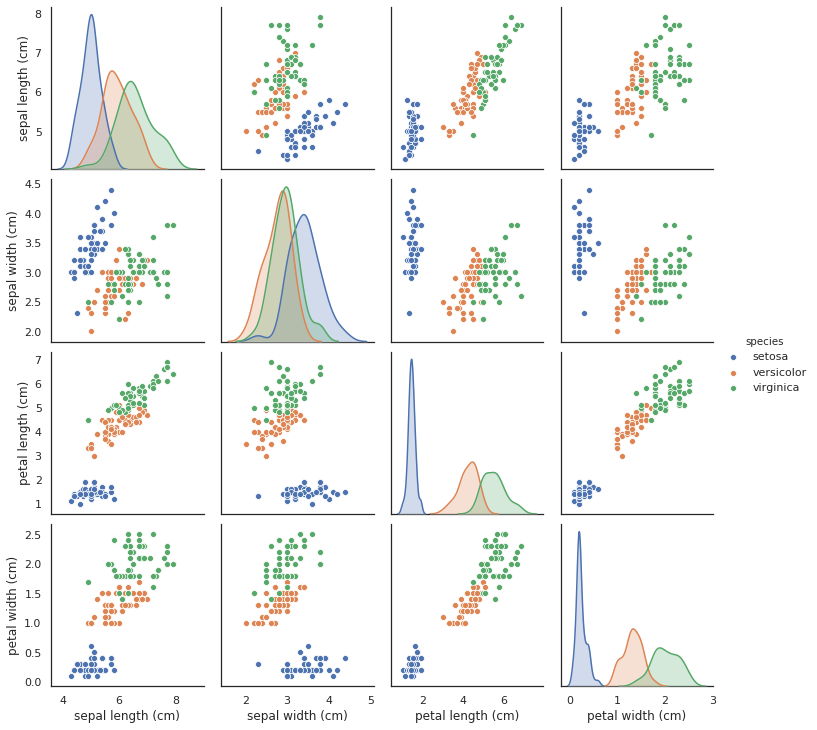

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
iris = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
#print(iris.DESCR)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

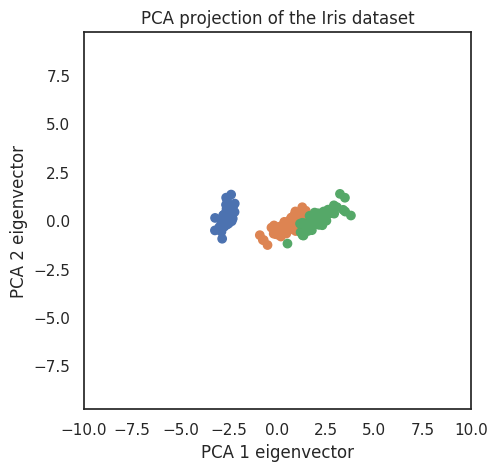

In [3]:
from sklearn.decomposition import PCA
iris=load_iris()
iris_pd = pd.DataFrame(
    iris.data,
    columns=features)
iris_pd[target] = iris.target
iris_pd.head()

pca = PCA(n_components=2)
points = pca.fit_transform(iris_pd[features])

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(points[:, 0],
            points[:, 1],
            c=[sns.color_palette()[x] for x in iris.target])
            #c=load_iris().target, s=20)
plt.xlabel('PCA 1 eigenvector')
plt.ylabel('PCA 2 eigenvector')
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the Iris dataset',fontsize = 12)
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([-10,10])

plt.show()

# 2. UMAP Example of dimension reduction

/home/henry/.local/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


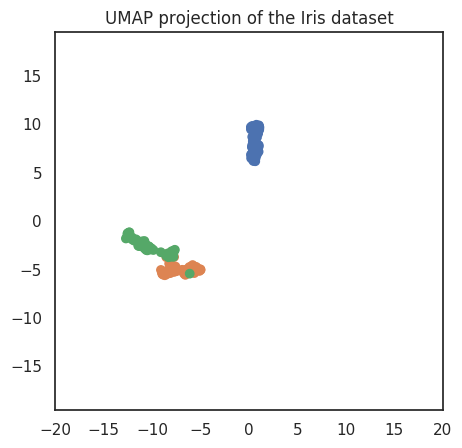

In [4]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(iris.data)
embedding.shape

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=12);
axes = plt.gca()
axes.set_xlim([-20,20])
axes.set_ylim([-20,20])

plt.show()

# 3. IVIS Example of dimension reduction

  ...
    to  
  ['...']


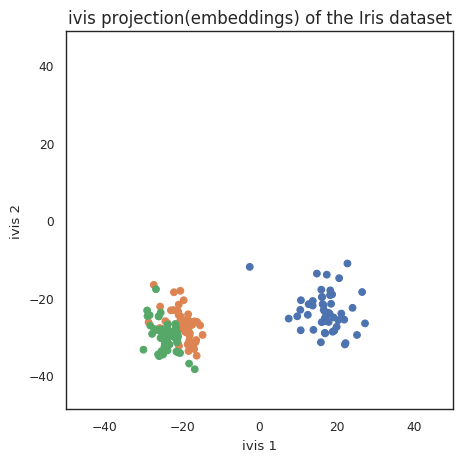

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

from ivis import Ivis

sns.set(context='paper', style='white')

X = load_iris().data
X = MinMaxScaler().fit_transform(X)

ivis = Ivis(k=5, model='maaten', verbose=0)
ivis.fit(X)

embeddings = ivis.transform(X)

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(embeddings[:, 0],
            embeddings[:, 1],
            c=[sns.color_palette()[x] for x in iris.target])
            #c=load_iris().target, s=20)
plt.xlabel('ivis 1')
plt.ylabel('ivis 2')
plt.gca().set_aspect('equal', 'datalim')
plt.title('ivis projection(embeddings) of the Iris dataset',fontsize = 12)
axes = plt.gca()
axes.set_xlim([-50,50])
axes.set_ylim([-50,50])

plt.show()

# 4. tSNE Example of dimension reduction

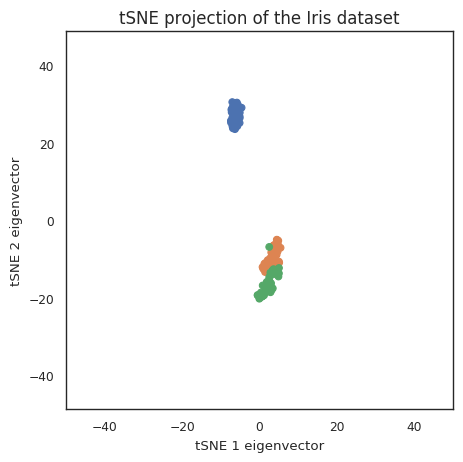

In [6]:
from sklearn.manifold import TSNE
iris = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris_pd = pd.DataFrame(
    iris.data,
    columns=features)
iris_pd[target] = iris.target
iris_pd.head()

tsne = TSNE(n_components=2, n_iter=1000, random_state=123)#123 is just a random seed for reproducibility.
points = tsne.fit_transform(iris_pd[features])

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(points[:, 0],
            points[:, 1],
            c=[sns.color_palette()[x] for x in iris.target])
            #c=load_iris().target, s=20)
plt.xlabel('tSNE 1 eigenvector')
plt.ylabel('tSNE 2 eigenvector')
plt.gca().set_aspect('equal', 'datalim')
plt.title('tSNE projection of the Iris dataset',fontsize = 12)
axes = plt.gca()
axes.set_xlim([-50,50])
axes.set_ylim([-50,50])

plt.show()

# 5. Circular coordinates Example of dimension reduction

In [7]:
type(iris)
iris_pd = pd.DataFrame(
    iris.data,
    columns=features)
iris_pd[target] = iris.target
iris_pd.head()
iris_ar=iris_pd.to_numpy()
type(iris_ar)
iris_ar=iris_ar[:,0:3]
print(iris_ar)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

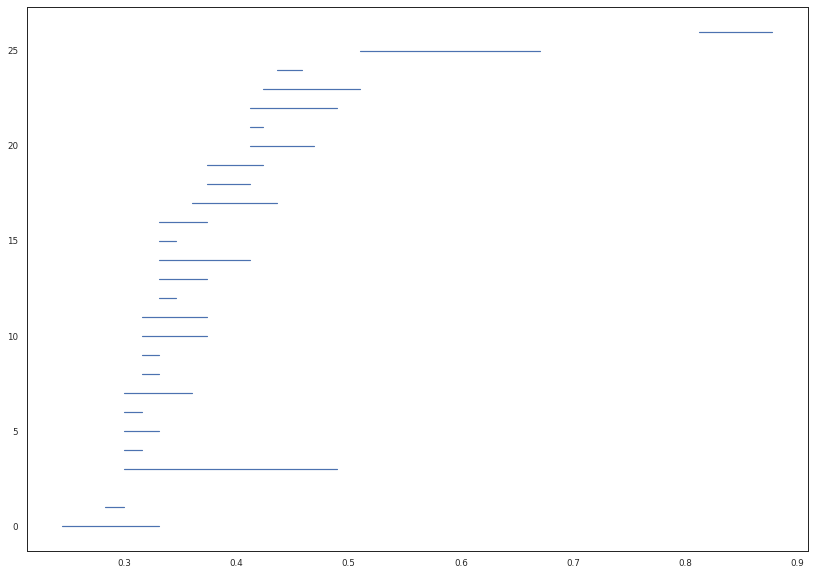

In [8]:
import dionysus as dionysus
prime = 23
vr = dionysus.fill_rips(iris_ar, 2, 10.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology based on the chosen parameters.
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using the designated coefficient field and complex.
dionysus.plot.plot_bars(dgms[1], show=True)

threshold = 0.1
bars = [bar for bar in dgms[1] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=1.
cocycles = [cp.cocycle(bar.data) for bar in bars]
#print(coords)

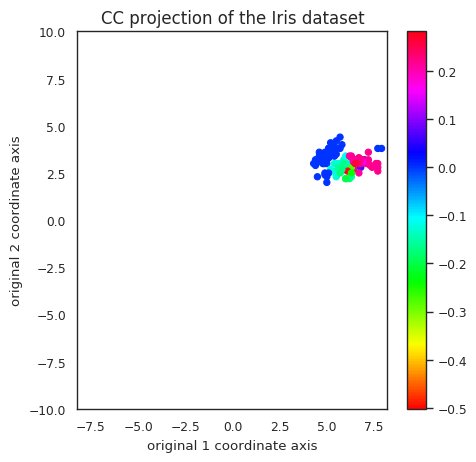

In [9]:
chosen_cocycle= cocycles[0]
chosen_bar= bars[0]
vr_8 = dionysus.Filtration([s for s in vr if s.data <= max([bar.birth for bar in bars])])
coords = dionysus.smooth(vr_8, chosen_cocycle, prime)

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(iris_ar[:,0],iris_ar[:,1],s=20, c=coords, cmap="hsv")
#scatter(*annulus.T, c= color, cmap="hsv")
plt.colorbar()
plt.xlabel('original 1 coordinate axis')
plt.ylabel('original 2 coordinate axis')
plt.gca().set_aspect('equal', 'datalim')
plt.title('CC projection of the Iris dataset',fontsize = 12)
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([-10,10])
plt.show()

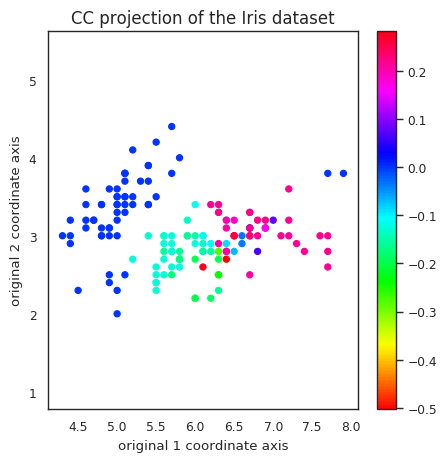

In [10]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(iris_ar[:,0],iris_ar[:,1],s=20, c=coords, cmap="hsv")
#scatter(*annulus.T, c= color, cmap="hsv")
plt.colorbar()
plt.xlabel('original 1 coordinate axis')
plt.ylabel('original 2 coordinate axis')
plt.gca().set_aspect('equal', 'datalim')
plt.title('CC projection of the Iris dataset',fontsize = 12)
#axes = plt.gca()
#axes.set_xlim([-10,10])
#axes.set_ylim([-10,10])
plt.show()

# Reference
https://towardsdatascience.com/t-sne-python-example-1ded9953f26
https://umap-learn.readthedocs.io/en/latest/basic_usage.html
https://bering-ivis.readthedocs.io/en/latest/python_package.html
https://www.nature.com/articles/s41598-019-45301-0#code-availability
https://github.com/olekscode/Examples-PCA-tSNE/blob/master/Python/Visualizing%20Iris%20Dataset%20using%20PCA%20and%20t-SNE.ipynb
